In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pickle as pkl

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

plt.rc('text', usetex=True)
plt.rc('xtick', direction='in')
plt.rc('ytick', direction='in')
plt.rc('font', family='serif')
plt.rc('font', family='serif')


let's just first test one of our dispersive bistability curves

In [40]:
# load coefficients from pkl
coefficients = pkl.load(open('polyfit.pkl', 'rb'))

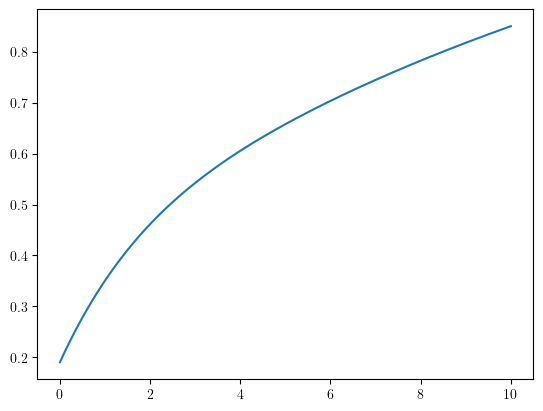

In [41]:
Iin = np.linspace(0,10,1000)
Iout = np.polyval(coefficients, Iin)

plt.plot(Iin, Iout, label='Polynomial fit')

In [44]:

# Define cavity NL function
class CavityActivation(nn.Module):
    def __init__(self):
        super(CavityActivation, self).__init__()
        
    def forward(self, x):
        coeffs = torch.tensor(coefficients, dtype=x.dtype, device=x.device)
        # Horner's method for faster evaluation
        poly_val = coeffs[0]
        for coeff in coeffs[1:]:
            poly_val = poly_val * x + coeff
        return poly_val

# barebones NN for mnist
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.activation = CavityActivation()
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

In [45]:

# load mnist
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=128, 
                                           shuffle=True)

model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [46]:
loss_list = []
for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_list.append(running_loss)
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss))


Epoch 1 loss: 1061.862
Epoch 2 loss: 1008.622
Epoch 3 loss: 885.074
Epoch 4 loss: 653.024
Epoch 5 loss: 432.108
Epoch 6 loss: 336.180
Epoch 7 loss: 279.062
Epoch 8 loss: 244.310
Epoch 9 loss: 223.772
Epoch 10 loss: 209.809


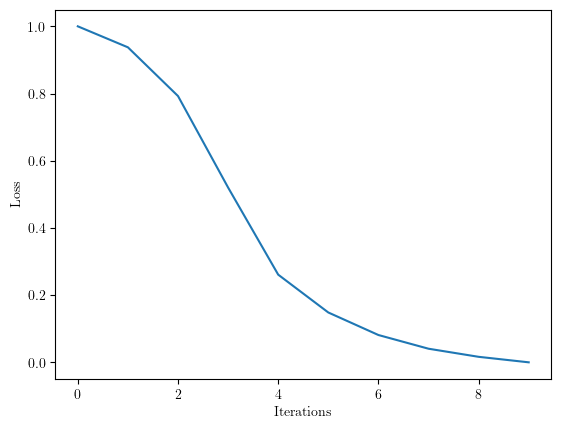

In [50]:
# normalize loss_list
loss_list = np.array(loss_list)
loss_list = (loss_list - np.min(loss_list)) / (np.max(loss_list) - np.min(loss_list))

plt.plot(range(10),loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [26]:
# iterate through polyfits folder and load each polyfit
coefficient_arr = []
# iterate through files in folder called polyfits
import os
for filename in os.listdir('polyfits'):
    if filename.endswith('.pkl'):
        coefficients = pkl.load(open('polyfits/' + filename, 'rb'))
        coefficient_arr.append(coefficients)
# coefficients = pkl.load(open('polyfit.pkl', 'rb'))

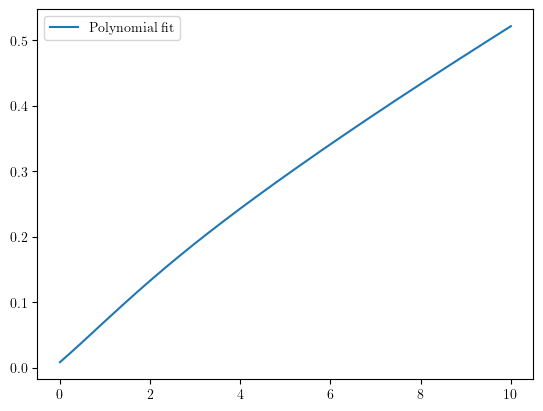

In [33]:
coefficients = pkl.load(open('polyfits/polyfit_0.3.pkl', 'rb')) 
Iin = np.linspace(0,10,1000)
Iout = np.polyval(coefficients, Iin)

plt.plot(Iin, Iout, label='Polynomial fit')
plt.legend()
plt.show()

/var/folders/fb/88sx83xj1mqf426gdkwn8ll80000gn/T/ipykernel_2340/3755457064.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Epoch 1 loss: 550.817
Epoch 2 loss: 200.990
Epoch 3 loss: 164.043
Epoch 4 loss: 144.126
Epoch 5 loss: 130.178
Epoch 6 loss: 119.649
Epoch 7 loss: 111.481
Epoch 8 loss: 104.155
Epoch 9 loss: 98.914
Epoch 10 loss: 93.045
Epoch 1 loss: 1075.483
Epoch 2 loss: 1064.878
Epoch 3 loss: 1051.687
Epoch 4 loss: 1033.211
Epoch 5 loss: 1005.629
Epoch 6 loss: 963.195
Epoch 7 loss: 897.302
Epoch 8 loss: 804.405
Epoch 9 loss: 685.221
Epoch 10 loss: 522.170
Epoch 1 loss: 1065.672
Epoch 2 loss: 1027.733
Epoch 3 loss: 943.972
Epoch 4 loss: 734.631
Epoch 5 loss: 473.260
Epoch 6 loss: 337.271
Epoch 7 loss: 277.613
Epoch 8 loss: 242.688
Epoch 9 loss: 222.490
Epoch 10 loss: 209.744
Epoch 1 loss: 1073.031
Epoch 2 loss: 1052.796
Epoch 3 loss: 1024.174
Epoch 4 loss: 975.273
Epoch 5 loss: 898.765
Epoch 6 loss: 802.640
Epoch 7 loss: 698.661
Epoch 8 loss: 600.206
Epoch 9 loss: 516.445
Epoch 10 loss: 450.438
Epoch 1 loss: 1070.905
Epoch 2 loss: 1048.944
Epoch 3 loss: 1014.438
Epoch 4 loss: 946.555
Epoch 5 loss: 820

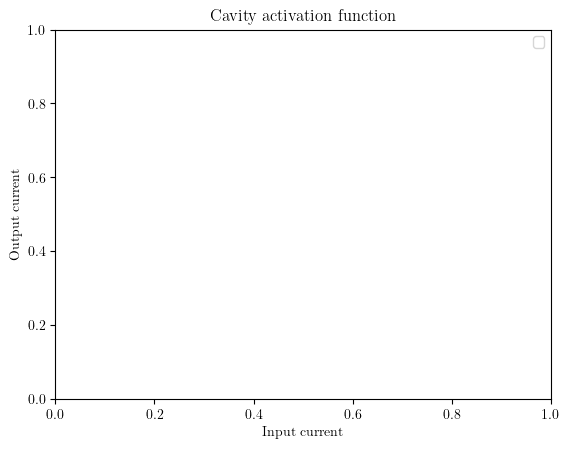

In [51]:
Iin = np.linspace(0,10,1000)
all_losses = []
deltas = [-0.1, -0.043, 0.3, 0.13, 0.014,0.071,0.186,0.242]
for coefficients in coefficient_arr:
    Iout = np.polyval(coefficients, Iin)
    # plt.plot(Iin, Iout, label='Polynomial fit')
    plt.xlabel('Input current')
    plt.ylabel('Output current')
    plt.title('Cavity activation function')
    plt.legend()

    # Define cavity NL function
    class CavityActivation(nn.Module):
        def __init__(self):
            super(CavityActivation, self).__init__()

        def forward(self, x):
            coeffs = torch.tensor(coefficients, dtype=x.dtype, device=x.device)
            # Horner's method for faster evaluation
            poly_val = coeffs[0]
            for coeff in coeffs[1:]:
                poly_val = poly_val * x + coeff
            return poly_val

    # # barebones NN for mnist
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(784, 128)
            self.activation = CavityActivation()
            self.fc2 = nn.Linear(128, 10)

        def forward(self, x):
            x = x.view(-1, 784)
            x = self.activation(self.fc1(x))
            x = self.fc2(x)
            return x


    # # load mnist
    train_dataset = datasets.MNIST(root='./data', 
                                   train=True, 
                                   download=True, 
                                   transform=transforms.ToTensor())
    train_loader = torch.utils.data.DataLoader(train_dataset, 
                                               batch_size=128, 
                                               shuffle=True)

    model = Net()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    loss_list = []
    for epoch in range(10):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        loss_list.append(running_loss)
        print('Epoch %d loss: %.3f' % (epoch + 1, running_loss))

    # normalize loss_list
    loss_list = np.array(loss_list)
    loss_list = (loss_list - np.min(loss_list)) / (np.max(loss_list) - np.min(loss_list))
    all_losses.append(loss_list)


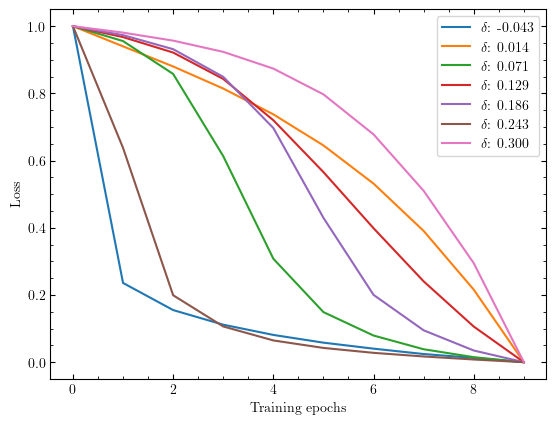

In [68]:
detunings = [-0.043, 0.243, 0.129, 0.0714, 0.186,0.3,0.014]
# make a tuple of detunings and losses
detuning_loss = list(zip(detunings, all_losses))
# sort by detuning
detuning_loss.sort(key=lambda x: x[0])
detunings, all_losses = zip(*detuning_loss)

for i in range(len(all_losses)):
    plt.plot(range(10), all_losses[i], label='$\delta$: %.3f' % detunings[i])
plt.xlabel('Training epochs')
plt.ylabel('Loss')
plt.tick_params(top=True, right=True, which='both')
plt.minorticks_on()
plt.tick_params(axis='both', which='major')
plt.tick_params(axis='both', which='minor')

plt.legend()
# plt.savefig('detuning_loss.png', dpi=300)